In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-06-16 10:18:33.394686: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 10:18:33.394749: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

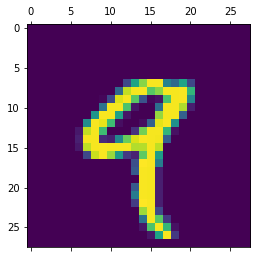

In [8]:
plt.matshow(X_train[4])

In [9]:
Y_train[4]

9

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 784)/255
X_test_flattened = X_test.reshape(len(X_test), 784)/255


In [11]:
Y_train.shape

(60000,)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, Y_train, epochs=5)

2022-06-15 21:35:43.465433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 21:35:43.466038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 21:35:43.466154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-15 21:35:43.466223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-15 21:35:43.466287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4681 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [13]:
model.evaluate(X_test_flattened, Y_test)

2022-06-15 21:36:17.904895: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9266


[0.26502886414527893, 0.9265999794006348]

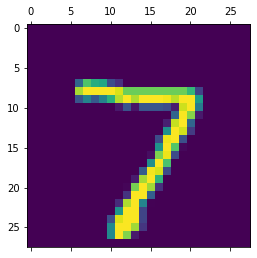

In [14]:
plt.matshow(X_test[0])

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

2022-06-15 21:36:19.456346: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step


array([1.2180286e-02, 2.9577359e-07, 4.4866249e-02, 9.5332378e-01,
       3.0138432e-03, 1.0595091e-01, 1.0921943e-06, 9.9981773e-01,
       9.2885464e-02, 5.6210774e-01], dtype=float32)

In [16]:
y_predicted_labels =  [np.argmax(i) for i in y_predicted]

In [17]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    4,    2,    0,    8,    6,    2,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  929,   16,   10,    6,   12,   10,   33,    4],
       [   1,    0,   19,  921,    1,   26,    2,   10,   19,   11],
       [   1,    1,    4,    1,  924,    0,    9,    4,   10,   28],
       [   7,    3,    4,   26,   11,  787,   12,    7,   29,    6],
       [   8,    3,    7,    1,    8,   14,  912,    2,    3,    0],
       [   1,    6,   22,    7,    8,    0,    0,  952,    1,   31],
       [   5,   10,    7,   21,    9,   30,    8,   14,  863,    7],
       [   8,    7,    2,    8,   36,    8,    0,   28,    4,  908]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

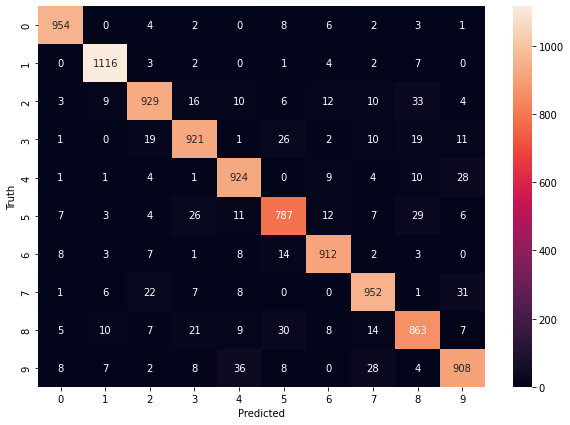

In [18]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, Y_train, epochs=5)


Epoch 1/5


2022-06-15 21:36:27.769010: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2727 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1236 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0651 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0525 - accuracy: 0.9841


In [20]:
model.evaluate(X_test_flattened, Y_test)

2022-06-15 21:37:10.919983: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9756


[0.07783617824316025, 0.975600004196167]

Text(69.0, 0.5, 'Truth')

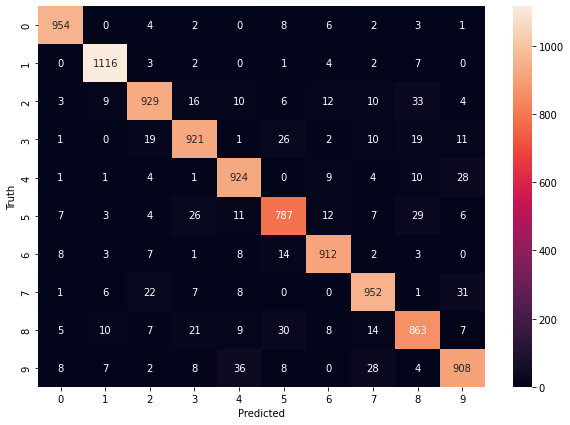

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predicted_labels)
cm
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/sgd", histogram_freq=1)

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, Y_train, epochs=5, callbacks=[tb_callback])


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 19.2669 - accuracy: 0.1897
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0605 - accuracy: 0.2012
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0589 - accuracy: 0.2022
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0468 - accuracy: 0.2026
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0271 - accuracy: 0.2053


In [10]:
%load_ext tensorboard
%tensorboard --logdir logs/